In [1]:
# Q1

# Import required libraries for data analysis and read the dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

# Read the dataset: learned to read Excel file for the first time
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [2]:
type(df) # Datatype

pandas.core.frame.DataFrame

In [3]:
df.describe() # Statistical Summary

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [4]:
df.shape # Shape of dataset

(660, 7)

In [5]:
df.isnull().sum() # Calculates total number of null values 

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
# There are no null values in the given dataset

In [7]:
# Check for incorrect imputations 
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [8]:
# All values are numeric 
# There are no incorrect imputations

In [9]:
df.head(10) # Shows the values of the first 10 rows

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [10]:
# The Serial number and customer key are for reference and need to be isolated for analysis
# The data set for cluster analysis shall consist of all rows and ignore first two columns

In [11]:
dfcluster=df.iloc[:,2:]

In [12]:
dfcluster.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [13]:
#The data is ready to slice and dice
# It seems the avargae credit limit is dominant and the data set require scaling

In [14]:
from scipy.stats import zscore
dfcluster_scaled=dfcluster.apply(zscore)
dfcluster_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


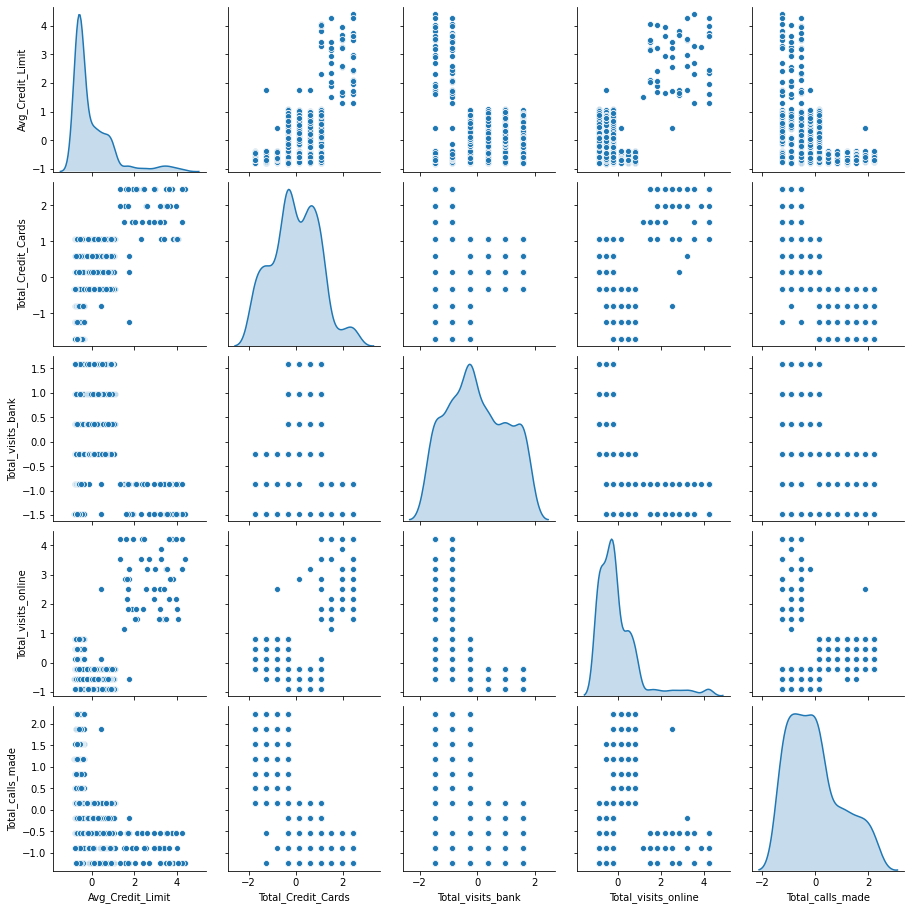

In [15]:
#The data is now standardized and thus eliminates the dominant effect
sns.pairplot(dfcluster_scaled, diag_kind='kde')

In [16]:
# Q3: Execute K-meansclustering use  elbow  plot and  analyse  clusters  using  boxplot
# From the plot it looks like there are 3-5 clusters
# The following shall demonstarte the Kemans clustering to group based on the similarities

Text(0.5, 1.0, 'KMeans selection with Elbow Method')

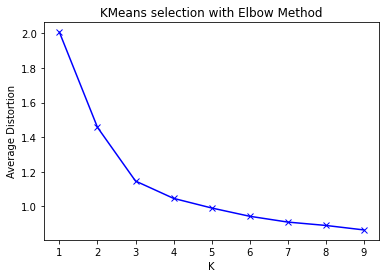

In [17]:
# let's find the optimum number of clusters
import matplotlib.pylab as gra
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfcluster_scaled)
    prediction=model.predict(dfcluster_scaled)
    meanDistortions.append(sum((np.min( cdist(dfcluster_scaled, model.cluster_centers_, 'euclidean'), axis=1))/ dfcluster_scaled.shape[0]))

gra.plot(clusters, meanDistortions, 'bx-' )
gra.xlabel('K')
gra.ylabel('Average Distortion')
gra.title('KMeans selection with Elbow Method')                      

In [18]:
# The elbow is around 3 as we see a sharp bend and the suggestion is to go for 3 clusters

In [19]:
Chosen_model=KMeans(3)
Chosen_model.fit(dfcluster_scaled)
prediction=Chosen_model.predict(dfcluster_scaled)

# Introducwe the prediction to the data set
df["Label"] = prediction
dfcluster["Label"] = prediction
dfcluster_scaled["Label"] = prediction

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2


In [20]:
# The Label is added to the originl and scaled data set 
# Three labels are added ---- 0,1,and 2
# Let's analyse the distribution in groups

In [21]:
BankCustomerGroup = df.groupby(['Label'])
BankCustomerGroup.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Label,,,,,,,
0,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


In [22]:
BankCustomerGroup = df.groupby(['Label'])
BankCustomerGroup.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Label,,,,,,,
0,224,224,224,224,224,224,224
1,386,386,386,386,386,386,386
2,50,50,50,50,50,50,50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025612C96BE0>,
      dtype=object)

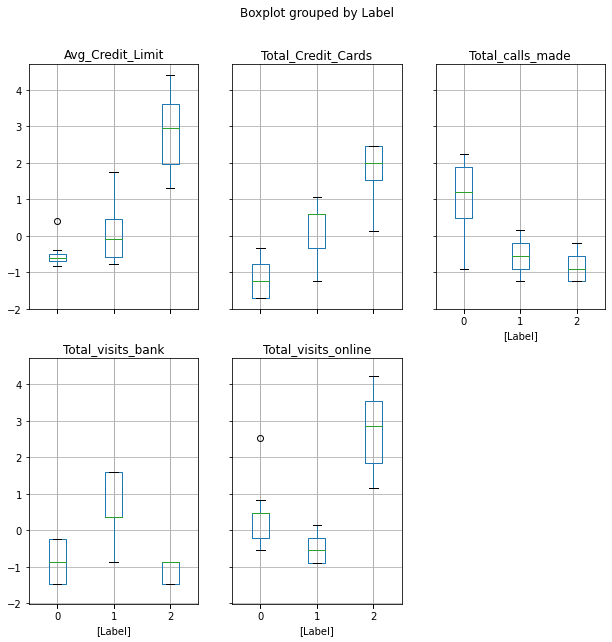

In [23]:
dfcluster_scaled.boxplot(by='Label', layout = (2,3), figsize=(10,10))

In [24]:
# Label-0 consist of 386 customers and they mostly visit in person. This group is teh core business and services must be tailored to fit there needs.
# Label-1 consists of 224 customers and average credit limit is not good; Need to explore the group by tailoring services to penetrate
# Label-2 consists of 50 customers and the group seems happy with online services

In [25]:
#Q4:Execute hierarchicalclustering(with different linkages) 
# with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot
# we'll go for 3 clusters

In [26]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(dfcluster_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [27]:
# Introducwe the cluster information to the data set without disturbing the label from KMeans
df["Group"] = model.labels_
dfcluster["Group"] = model.labels_
dfcluster_scaled["Group"] = model.labels_

In [28]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label,Group
0,1,87073,100000,2,1,1,0,1,0
1,2,38414,50000,3,0,10,9,0,2
2,3,17341,50000,7,1,3,4,1,0
3,4,40496,30000,5,1,1,4,1,0
4,5,47437,100000,6,0,12,3,2,1


In [29]:
AgglClustering=df.groupby(['Group'])
AgglClustering.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
Group,,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,1
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2
2,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,0


In [30]:
AgglClustering.count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
Group,,,,,,,,
0,386,386,386,386,386,386,386,386
1,50,50,50,50,50,50,50,50
2,224,224,224,224,224,224,224,224


In [31]:
# Similar result from the KMeans Clustering when used 3 clusters
# Let's explore further to use the library to get recommendations on clustering

In [32]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(dfcluster_scaled, metric='euclidean', method='average')
c, cophenet = cophenet(Z , pdist(dfcluster_scaled))

c

0.9326509851302

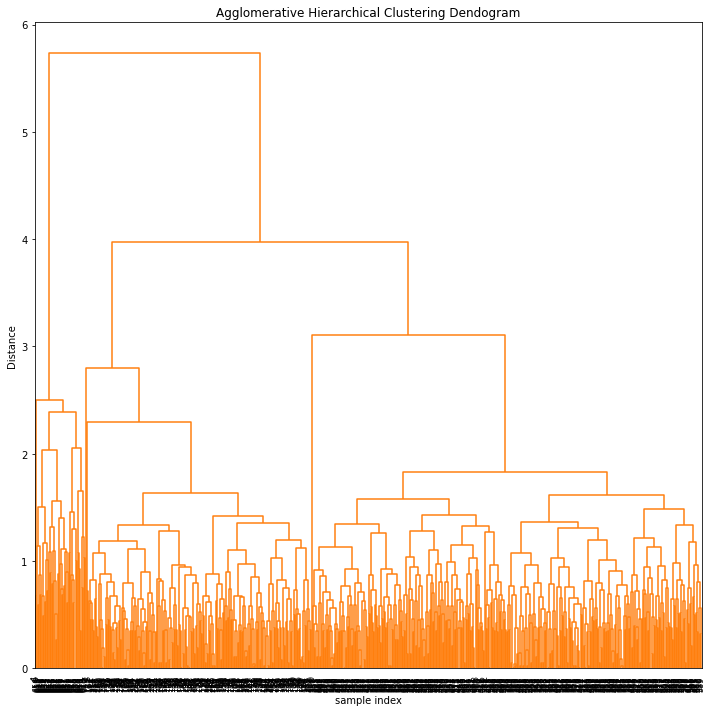

In [33]:
gra.figure(figsize=(10, 10))
gra.title('Agglomerative Hierarchical Clustering Dendogram')
gra.xlabel('sample index')
gra.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
gra.tight_layout()

In [34]:
# We saw average linkage and now let's explore COMPLETE linkage
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(dfcluster_scaled, metric='euclidean', method='complete')
c, cophenet = cophenet(Z , pdist(dfcluster_scaled))

c

0.9200216505568093

In [35]:
# cophenet index reduced from 94% to 92%

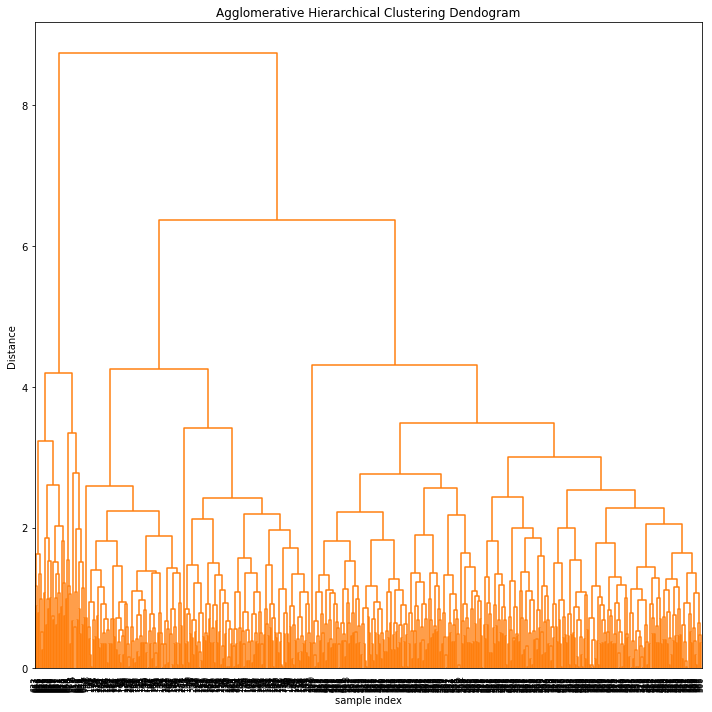

In [36]:
gra.figure(figsize=(10, 10))
gra.title('Agglomerative Hierarchical Clustering Dendogram')
gra.xlabel('sample index')
gra.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
gra.tight_layout()

In [37]:
#The distance at which they combine differs 
# But the results in terms of number of clusters are very similar
# We are getting consistent dendograms from different methods

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025614C8F0A0>,
      dtype=object)

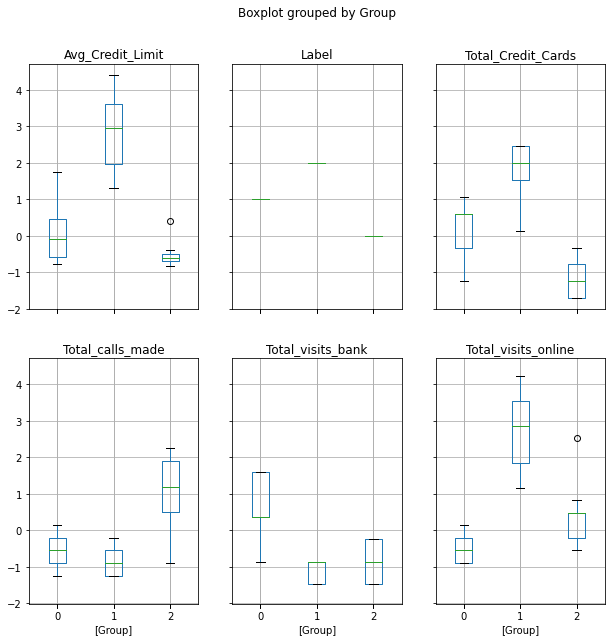

In [38]:
dfcluster_scaled.boxplot(by='Group', layout = (2,3), figsize=(10,10))

In [39]:
# The group is different than teh label clusters
# Group-0 consist of 386 customers and they mostly visit in person. This group is teh core business and services must be tailored to fit there needs.
# Group-1 consists of 50 customers and the group seems happy with online services
# Group-2 consists of 224 customers and average credit limit is not good; Need to explore the group by tailoring services to penetrate

In [40]:
#Q5. Calculate average silhouette score for both methods.

In [41]:
dfsil=dfcluster_scaled.iloc[:,:5]
dfsil.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


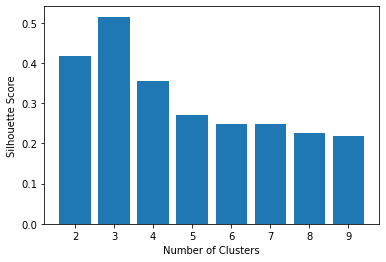

In [42]:
from sklearn.metrics import silhouette_score
silhouette_scores =[]
for n in range (2,10):
    silhouette_scores.append(silhouette_score(dfsil, KMeans(n_clusters=n).fit_predict(dfsil)))
    
# Plot the silhouette_scores
k = [2,3,4,5,6,7,8,9]
gra.bar(k,silhouette_scores)
gra.xlabel('Number of Clusters')
gra.ylabel('Silhouette Score')
gra.show()

In [43]:
# A better silhouette score indicates improved cluster definition
# The graph shows that 3-clusters is optimum with highest Silhouette score

In [44]:
#Q6.Compare K-means clusters with Hierarchical clusters.
# The comparison in terms of performance and decisions are detailed above
# Both the methods explore the similarities within the dataset
# Both the methods recommend on teh number of optimum clusters
# For this example, the optimum number of clusters is 3

In [45]:
# Q7.Analysis  the  clusters  formed
# how  is  one  cluster  different  from  another

# There are 3 clusters
# Cluster-1 consist of 386 customers and they mostly visit in person. This group is the core business and services must be tailored to fit there needs.
# Group-1 consists of 50 customers and have highest credit limits and posssess more credit cards. They visit mostly online and the online services need to be fit-for-purpose
# Group-2 consists of 224 customers and average credit limit is not good; Need to explore the group by tailoring services to penetrate this market by giving them personal calls

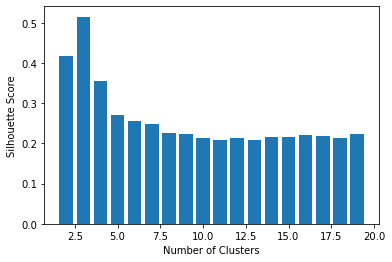

In [46]:
# Plot the silhouette_scores
silhouette_scores =[]
for n in range (2,20):
    silhouette_scores.append(silhouette_score(dfsil, KMeans(n_clusters=n).fit_predict(dfsil)))
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
gra.bar(k,silhouette_scores)
gra.xlabel('Number of Clusters')
gra.ylabel('Silhouette Score')
gra.show()